In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [15]:
# runs=['03','04','05','06','07','08','09','10','11','13','15']
runs=['03','04','05','06','07','08','09','10','11','12','13']

#runt=np.arange(2,11)
def fname(run):
    return('../rundf/df_run_land_t' + run + '_rr.pkl')
#     return('rundf/df_run_land_dry_t' + run + '.pkl')

dfs=[pd.read_pickle(fname(r)) for r in runs]

In [16]:
def getHalfLife(y,ax,tmin=0,tmax=12,C=0,run=0):
    t=np.arange(tmin,tmax)
    y=y[tmin:tmax+1]
    def fit_exp_linear(t, y, C=0):
        y = y - C
        y = np.log(y)
        K, A_log = np.polyfit(t, y, 1)
        A = np.exp(A_log)
        return A, K
    def model_func(t, A, K, C):
        return A * np.exp(K * t) + C
    print(t)
    print(y)
    A, K = fit_exp_linear(t, y, C=C)
    fit_y = model_func(t, A, K, C)

    r2=np.power(np.corrcoef(y,fit_y)[0,1],2)

    ax.plot(t,y)
    ax.plot(t,fit_y)
    ax.grid(True)

    thalf=-np.log(2)/K
    ax.text(0.6,0.8,'t$_{1/2}$=' + str(round(thalf,2)), transform=ax.transAxes)
    ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)
    ax.text(0.6,0.87,'Landtime=' + str(run), transform=ax.transAxes)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel('Pdef (hPa)')
    return(thalf)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[52.45739746 48.96899414 44.85888672 41.04797363 37.06103516 33.30615234
 30.54931641 27.64874268 25.35150146 23.2411499  21.16027832 19.14746094]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[88.51776123 83.640625   76.16522217 69.82458496 62.98486328 58.66571045
 53.74139404 49.17382812 45.4621582  41.83856201 38.40942383 35.40100098]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[105.01031494  97.07922363  88.17327881  80.36785889  72.015625
  66.68408203  61.36486816  56.5579834   51.90454102  47.6171875
  43.73120117  40.29504395]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[106.14129639  98.18115234  89.1005249   80.90618896  74.21740723
  68.20397949  62.58355713  58.14892578  53.66766357  49.2677002
  45.48535156  41.49926758]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[96.29150391 89.44604492 82.35705566 76.25402832 71.01849365 66.06616211
 61.30541992 56.96600342 52.71746826 48.48266602 44.203125   40.55334473]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[76.62261963 72

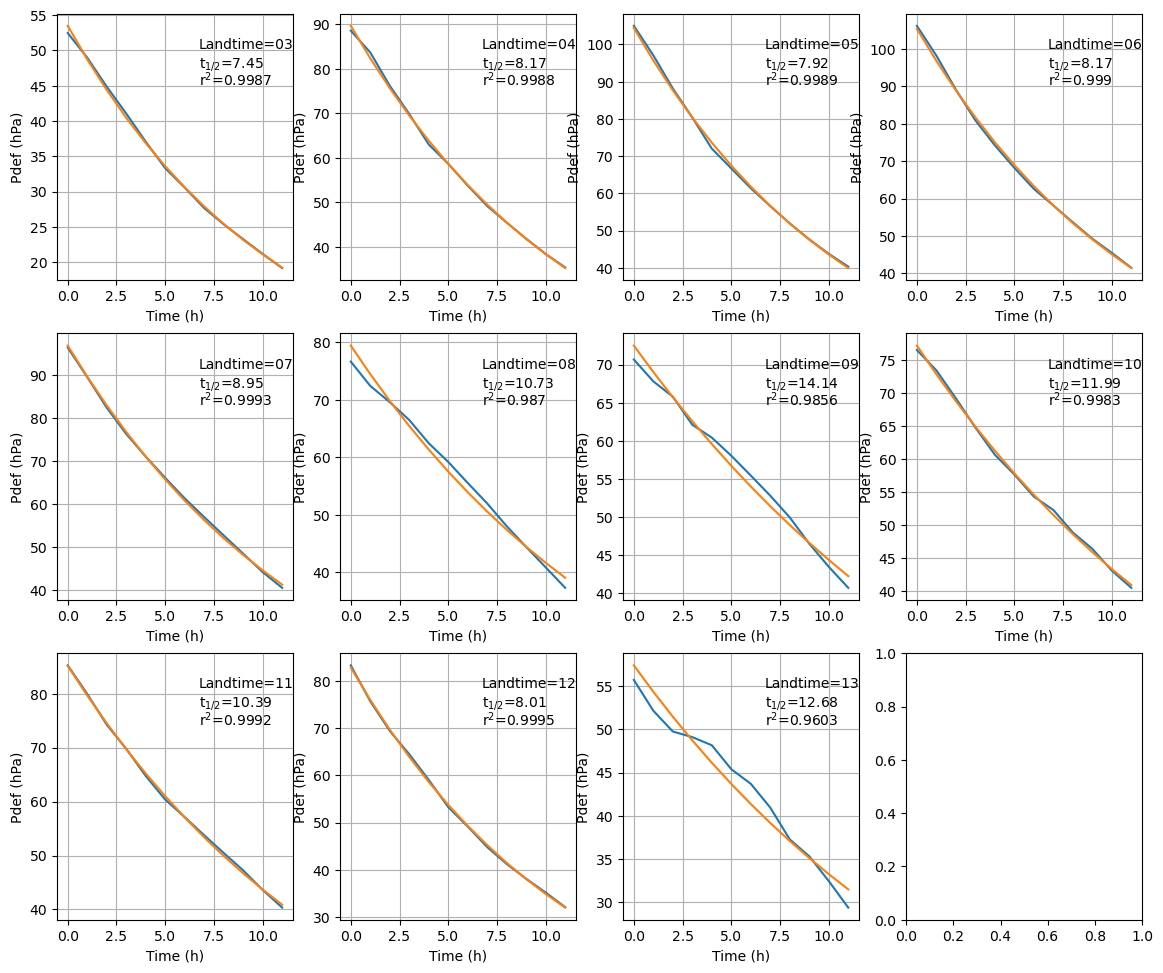

In [17]:
def pdef(p):
    return(1016-p)

fig, axs = plt.subplots(3,4,figsize=(14,12),dpi=100)
P0=[]
R0=[]
V0=[]
th=[]
for n,df in enumerate(dfs):
    p=df.pmin.values
    R0.append(df.rV10max.values[0])
    V0.append(df.V10max.values[0])
    y=pdef(p)
    P0.append(y[0])
    vm=df.V10max.values[0]
    th.append(getHalfLife(y,axs.flat[n],run=runs[n],tmin=0))

# plt.plot(V0,R0)

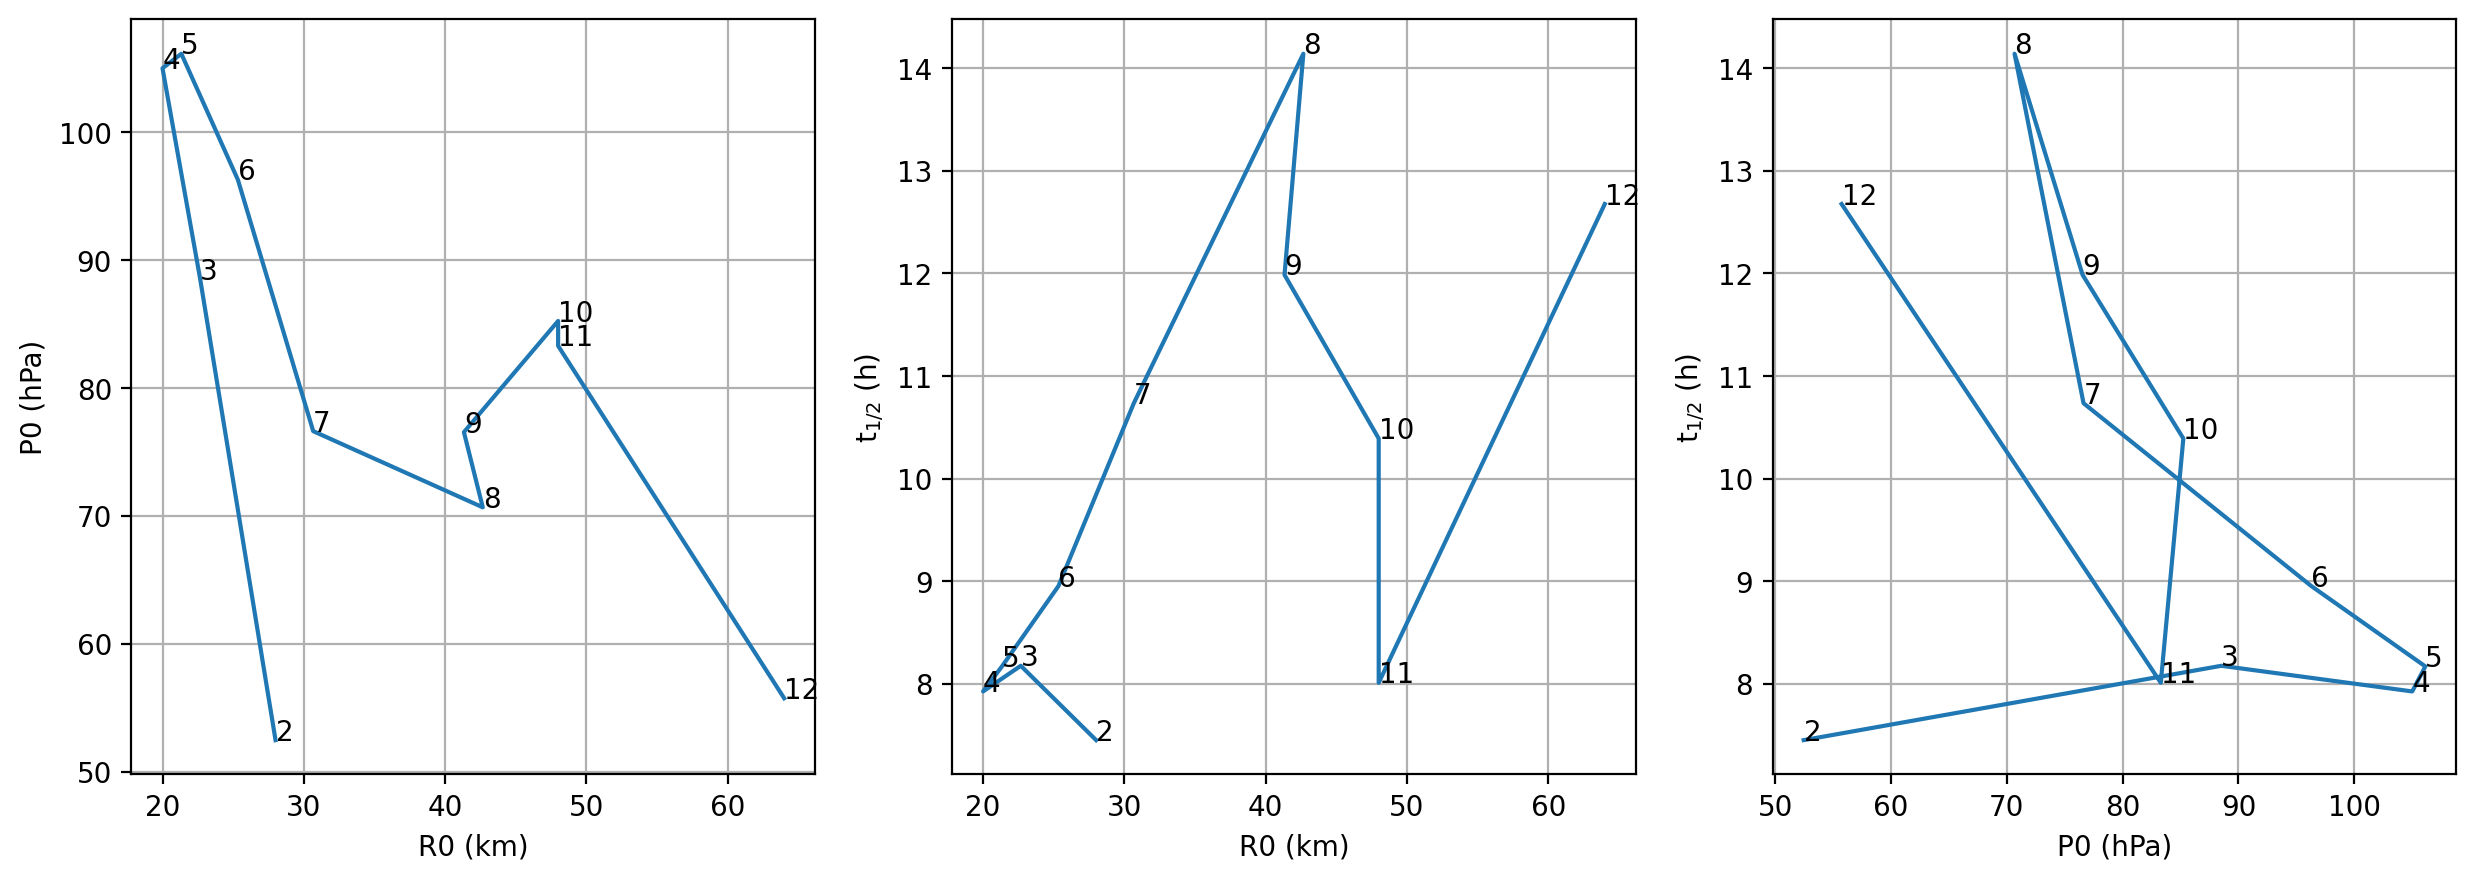

In [18]:
def plot_xy(x,y,xl,yl,ts,ax):
  ax.plot(x,y)
  ax.set_xlabel(xl)
  ax.set_ylabel(yl)
  ax.grid(True)
  for n,t in enumerate(ts):
    ax.text(x[n],y[n],str(int(t)-1))

fig,axs=plt.subplots(1,3,figsize=(15,5),dpi=200)

plot_xy(R0,P0,'R0 (km)','P0 (hPa)',runs,axs[0])
plot_xy(R0,th,'R0 (km)','t$_{1/2}$ (h)',runs,axs[1])
plot_xy(P0,th,'P0 (hPa)','t$_{1/2}$ (h)',runs,axs[2])

